In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load data
pd.set_option('display.max_columns', None)
data = pd.read_csv("E:\College\cl\data (cl)\house_price\data_preprocess.csv")
data

,price_in_rp,lat,long,property_type,ads_id,land_size_m2,building_size_m2,certificate,year_built,property_condition,building_orientation,furnishing
0,212,96,302,0,2350,162,138,4,34,1,0,4
1,43,96,302,0,417,331,275,1,0,1,0,0
2,130,96,302,0,421,33,35,1,0,1,0,4
3,230,96,302,0,703,111,76,4,33,2,8,4
4,309,96,302,0,507,223,95,4,30,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2958,403,202,65,0,2395,377,185,4,39,3,0,2
2959,505,177,20,0,2321,407,255,4,39,3,8,4
2960,489,177,20,0,2319,395,255,4,39,3,8,4
2961,512,185,39,0,2312,347,268,4,39,3,4,2


In [4]:
x = data[['lat', 'long',	'property_type',	'ads_id',	'land_size_m2',	'building_size_m2',	'certificate',	'year_built',	
          'property_condition',	'building_orientation',	'furnishing']]

y = data['price_in_rp']

### Split Data
Splitting data into data train and data test

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

### Create and train the model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [13]:
lm.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [14]:
print(lm.intercept_)

66.50342386533202


In [16]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
lat,9.123355e-03
long,5.641594e-04
property_type,-3.330669e-15
ads_id,3.128863e-03
land_size_m2,1.056102e-01
building_size_m2,3.446461e-01
certificate,4.379800e+00
year_built,8.693615e-01
property_condition,3.371373e+00
building_orientation,1.551387e+00


### Prediction

In [17]:
predictions = lm.predict(x_test)

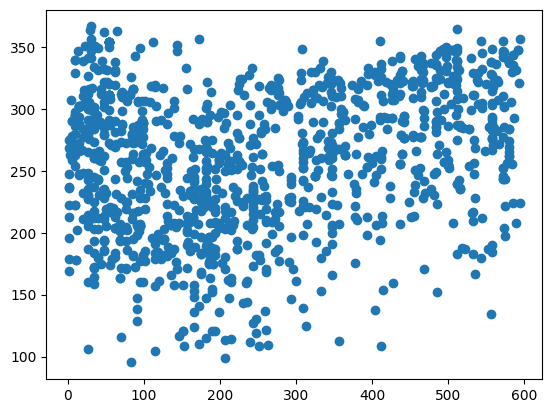

In [22]:
plt.scatter(y_test,predictions)

C:\Users\saffana\AppData\Local\Temp\ipykernel_1044\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


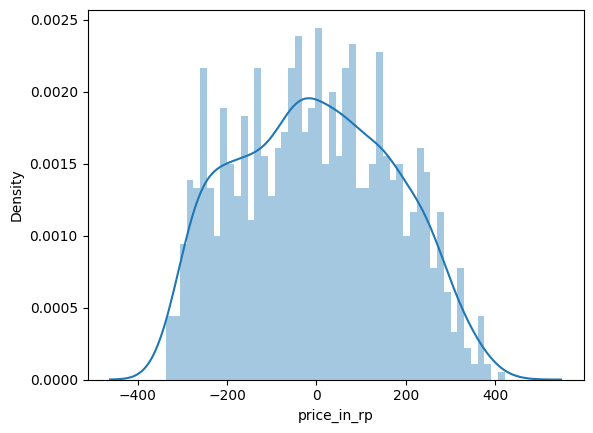

In [25]:
sns.distplot((y_test-predictions),bins=50);

### Evaluation Metrics

In [26]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 145.30665952442976
MSE: 29855.425253309688
RMSE: 172.78722537650083
